<h1>Data Analysis of Road Accidents: Uncovering Risk Patterns and Severity Factors</h1>

<h2 style="color:red">IMPORT LIBRARY</h2>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

<h2 style="color:red">Load Data</h2>

In [2]:
df= pd.read_csv('/kaggle/input/car-accident-dataset/Road Accident Data.csv')

<h2 style="color:red">Data cleaning and Preprocessing</h2>

In [3]:
df.head(5)

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         5424 non-null    object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

In [5]:
#number of null values in rows
df.isnull().sum()[df.isnull().sum() > 0]

Carriageway_Hazards        302549
Road_Surface_Conditions       317
Road_Type                    1534
Time                           17
Weather_Conditions           6057
dtype: int64

In [6]:
#Remove duplicate rows
df.drop_duplicates(inplace=True)

#Drop unnecessary columns
df.drop('Carriageway_Hazards', axis=1, inplace=True)

<h3>Handle Missing values</h3>

In [7]:
#Filling missing value
df['Time'].fillna(df['Time'].mode()[0], inplace=True)

#Road_Surface_Conditions <=> Weather_Conditions (mapping)
print(df['Weather_Conditions'].unique())
print(df['Road_Surface_Conditions'].unique())

['Fine no high winds' 'Other' 'Raining no high winds'
 'Snowing no high winds' 'Fine + high winds' 'Raining + high winds' nan
 'Snowing + high winds' 'Fog or mist']
['Dry' 'Wet or damp' 'Frost or ice' 'Snow' 'Flood over 3cm. deep' nan]


In [8]:
mapping = {
    'Dry': 'Fine no high winds',
    'Wet or damp': 'Raining no high winds',
    'Snow': 'Snowing no high winds',
    'Frost or ice': 'Snowing + high winds'
}
# Filling missing value in Weather_Conditions
df['Weather_Conditions'].fillna(df['Road_Surface_Conditions'].map(mapping), inplace=True)
df['Weather_Conditions'].fillna('Other', inplace=True)

# Reverse mapping 
reverse_mapping = {v: k for k, v in mapping.items()}

# Filling missing Road_Surface_Conditions using reverse mapping
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].fillna(df['Weather_Conditions'].map(reverse_mapping))
df['Road_Surface_Conditions'].fillna('Other', inplace=True)


In [9]:
# Review values in each columns
columns_checked = ['Junction_Control', 'Junction_Detail', 'Accident_Severity', 'Light_Conditions', 'Vehicle_Type', ]
for col in columns_checked:
    print(df[col].unique())

['Give way or uncontrolled' 'Auto traffic signal'
 'Data missing or out of range' 'Authorised person' 'Stop sign'
 'Not at junction or within 20 metres' 'Auto traffic sigl']
['T or staggered junction' 'Crossroads'
 'Not at junction or within 20 metres' 'Roundabout' 'Mini-roundabout'
 'More than 4 arms (not roundabout)' 'Private drive or entrance'
 'Slip road' 'Other junction']
['Serious' 'Slight' 'Fetal' 'Fatal']
['Daylight' 'Darkness - lights lit' 'Darkness - lighting unknown'
 'Darkness - lights unlit' 'Darkness - no lighting']
['Car' 'Taxi/Private hire car' 'Motorcycle over 500cc'
 'Van / Goods 3.5 tonnes mgw or under' 'Goods over 3.5t. and under 7.5t'
 'Motorcycle 125cc and under' 'Motorcycle 50cc and under'
 'Bus or coach (17 or more pass seats)' 'Goods 7.5 tonnes mgw and over'
 'Other vehicle' 'Motorcycle over 125cc and up to 500cc'
 'Agricultural vehicle' 'Minibus (8 - 16 passenger seats)' 'Pedal cycle'
 'Ridden horse']


<h3>Replace incorrect values</h3>

In [10]:
#Replace incorrect values
df['Junction_Control'].replace('Auto traffic sigl', 'Auto traffic signal', inplace=True)
df['Accident_Severity'].replace('Fetal', 'Fatal', inplace=True)

<h3>Group Junction</h3>

In [11]:
# e.g. 'At junction', 'Roundabout', 'T-junction', 'Other'
df['Junction_Group'] = df['Junction_Detail'].replace({
    'Crossroads': 'Junction',
    'T or staggered junction': 'Junction',
    'Roundabout': 'Roundabout',
    'Slip road': 'Other',
    'More than 4 arms (not roundabout)': 'Junction',
    'Private drive or entrance': 'Other',
    'Other junction': 'Other',
    'Unknown': 'Unknown'
})


<h3>Extract Accident Date</h2>

In [12]:
df['Accident Date'] = pd.to_datetime(df['Accident Date'], errors='coerce')


df['Month_Year'] = df['Accident Date'].dt.to_period('M').astype(str)

<h3>Convert Time column (likely string format) into a usable datetime or hour-based format for analysis.</h3>

In [13]:
df['Time'].head()

0    15:11
1    10:59
2    14:19
3     8:10
4    17:25
Name: Time, dtype: object

In [14]:
# Extract hour
df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour
df['Hour'].unique()

/tmp/ipykernel_13/3310288436.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour


array([15, 10, 14,  8, 17, 11, 13, 12,  9,  0, 22, 23,  1,  7, 16, 20, 19,
       21,  6, 18,  5,  3,  2,  4], dtype=int32)

In [15]:
def time_of_day(hour):
    if pd.isnull(hour):
        return 'Unknown'
    elif 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['TimeOfDay'] = df['Hour'].apply(time_of_day)


<h2 style="color:red">Data Visualization</h2>

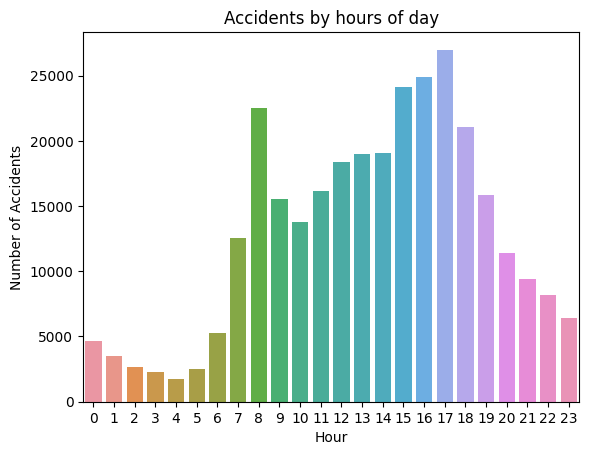

In [16]:
sns.countplot(data=df, x='Hour')
plt.title('Accidents by hours of day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.show()


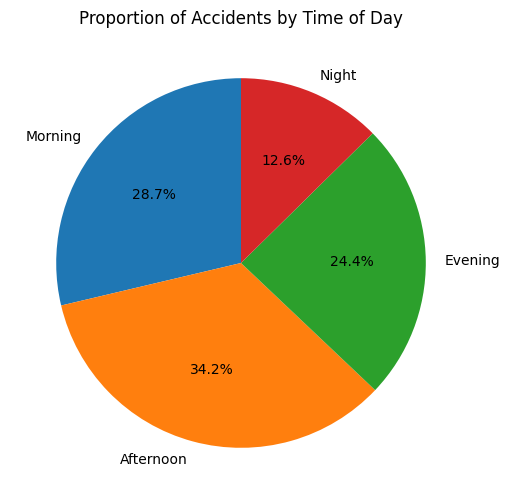

In [17]:

# Count number accidents by TimeOfDay
time_counts = df['TimeOfDay'].value_counts().reindex(['Morning', 'Afternoon', 'Evening', 'Night'])

# Pie chart showing the proportion of traffic accidents by time of day
plt.figure(figsize=(6, 6))
plt.pie(time_counts, labels=time_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Proportion of Accidents by Time of Day")
plt.show()


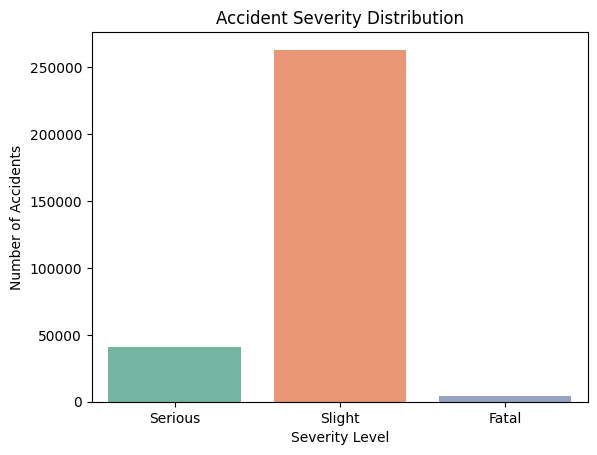

In [18]:
# Bar chart showing the distribution of traffic accidents by severity level
sns.countplot(data=df, x='Accident_Severity', palette='Set2')
plt.title("Accident Severity Distribution")
plt.xlabel("Severity Level")
plt.ylabel("Number of Accidents")
plt.show()


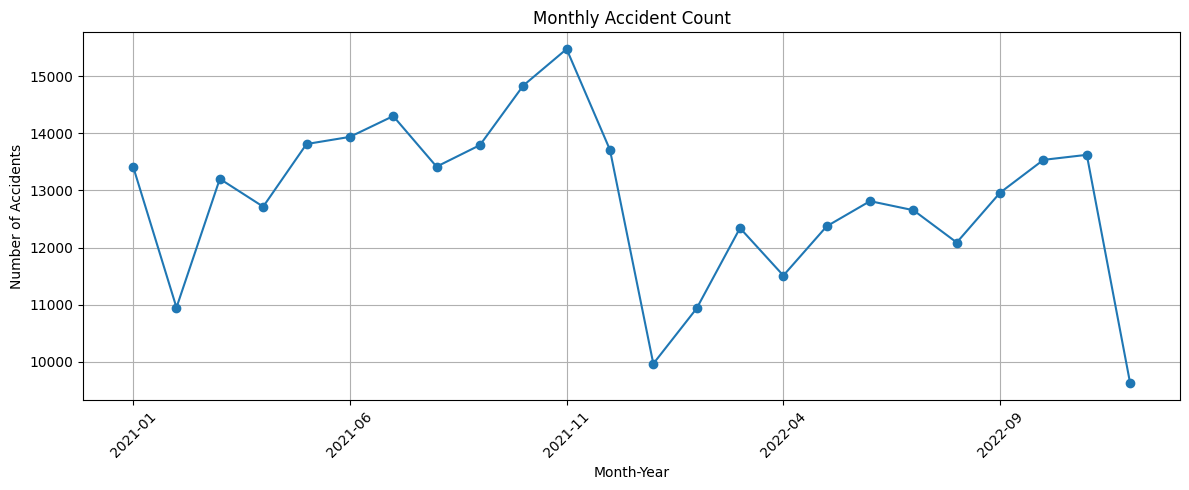

In [19]:
# Line chart showing the number of traffic accidents recorded each month
monthly_counts = df.groupby('Month_Year').size()
monthly_counts.plot(kind='line', figsize=(12, 5), marker='o')
plt.title('Monthly Accident Count')
plt.ylabel('Number of Accidents')
plt.xlabel('Month-Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


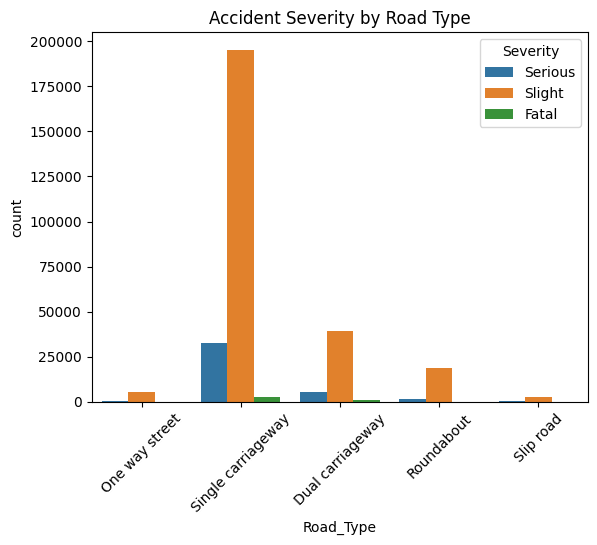

In [20]:
# Grouped bar chart showing accident severity levels across different road types
sns.countplot(data=df, x='Road_Type', hue='Accident_Severity')
plt.title("Accident Severity by Road Type")
plt.xticks(rotation=45)
plt.legend(title='Severity')
plt.show()


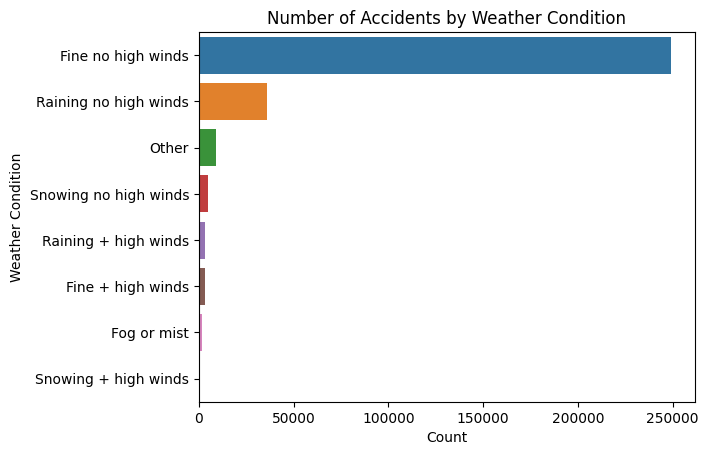

In [21]:
# Horizontal bar chart showing the number of accidents under different weather conditions
weather_order = df['Weather_Conditions'].value_counts().index
sns.countplot(data=df, y='Weather_Conditions', order=weather_order)
plt.title("Number of Accidents by Weather Condition")
plt.xlabel("Count")
plt.ylabel("Weather Condition")
plt.show()


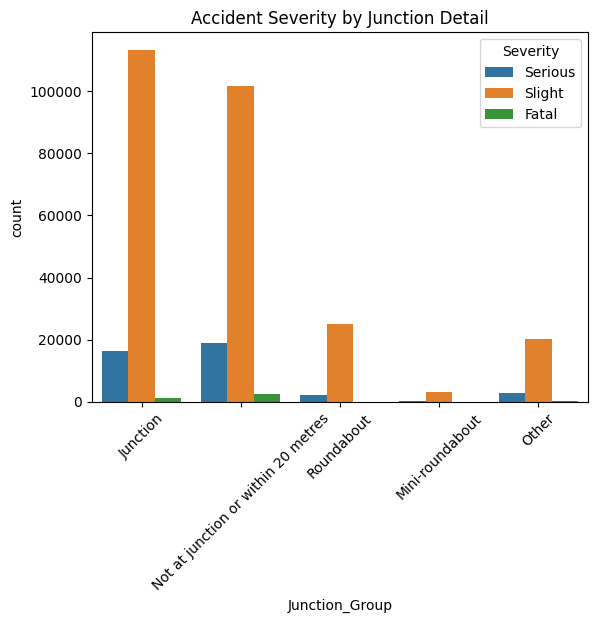

In [22]:
# Grouped bar chart showing accident severity levels across different junction types
sns.countplot(data=df, x='Junction_Group', hue='Accident_Severity')
plt.title("Accident Severity by Junction Detail")
plt.xticks(rotation=45)
plt.legend(title="Severity")
plt.show()


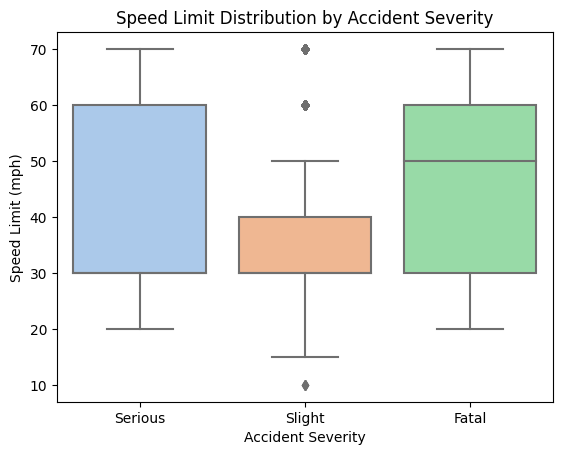

In [23]:
# Boxplot showing how speed limits vary across different accident severity levels
sns.boxplot(data=df, x='Accident_Severity', y='Speed_limit', palette='pastel')
plt.title("Speed Limit Distribution by Accident Severity")
plt.xlabel("Accident Severity")
plt.ylabel("Speed Limit (mph)")
plt.show()



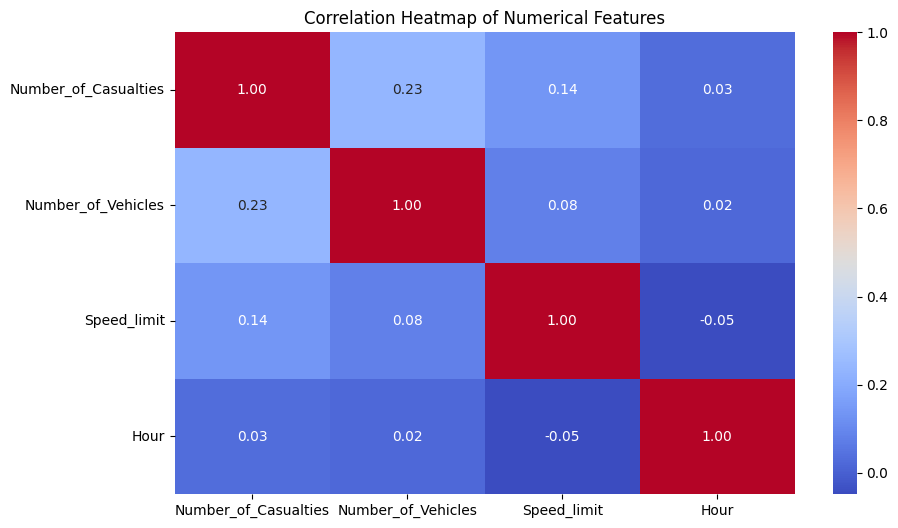

In [24]:
# Drop 'Latitude' and 'Longitude' correctly
drop_cols = {'Latitude', 'Longitude'} 
df_heatmap = df.drop(columns=drop_cols) 

# Select only numeric columns
numeric_df = df_heatmap.select_dtypes(include='number')
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()



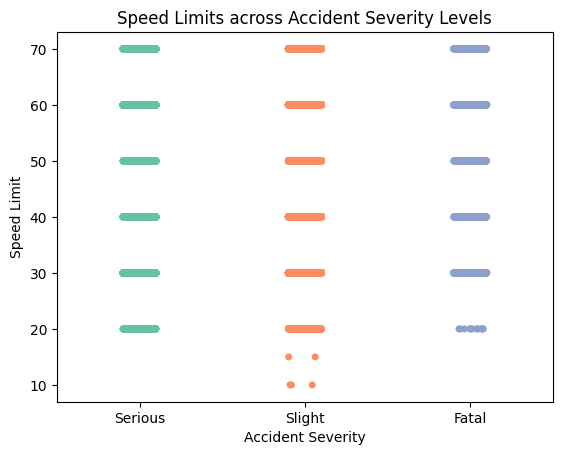

In [25]:
# Stripplot showing individual accident cases by speed and severity
sns.stripplot(data=df, x='Accident_Severity', y='Speed_limit', jitter=True, palette='Set2')
plt.title("Speed Limits across Accident Severity Levels")
plt.xlabel("Accident Severity")
plt.ylabel("Speed Limit")
plt.show()


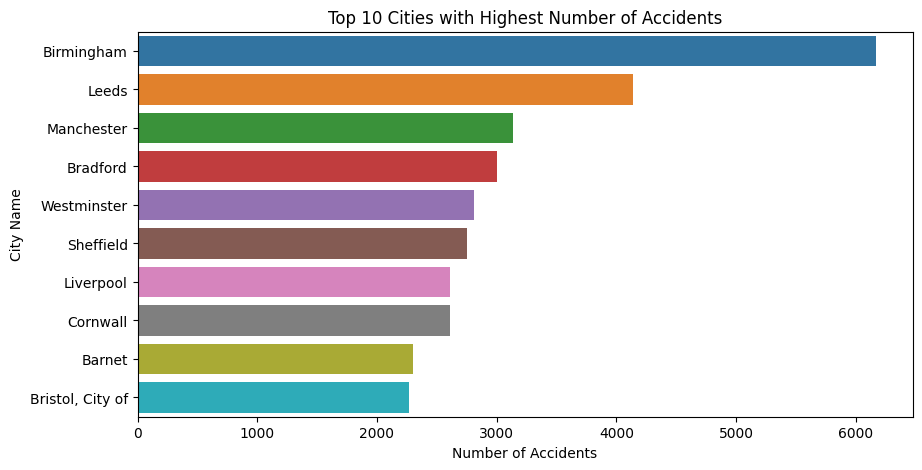

In [26]:
top_streets = df['Local_Authority_(District)'].value_counts().nlargest(10)

plt.figure(figsize=(10,5))
sns.barplot(y=top_streets.index, x=top_streets.values)
plt.title("Top 10 Cities with Highest Number of Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("City Name")
plt.show()
